# 胜率（odds）和加数

## 1、胜率
我们用0-1的数字表示概率</br>
打比赛的时候，预测时会说胜率（odds in favor）为3：1，也就是说有75%获胜的概率；当概率较小的时候，会称为赔率（odds against）</br>
贝叶斯定理的胜率形式：（假设我们有AB两个假设）
$$ P(A|D) = \frac{P(D|A)P(A)}{P(D)}\\
P(B|D) = \frac{P(D|B)P(B)}{P(D)}\\
$$
则有：</br>
$$\frac{P(A|D)}{P(B|D)} = \frac{P(D|A)P(A)}{P(D|B)P(B)}$$
假设AB代表 胜率，也就是说$P(B) = 1 - P(A)$,有</br>
$$o(A|D) = o(A)\frac{P(D|A)}{P(D|B)}$$
说明了**后验胜率是 先验胜率乘以似然比**
### （1） 曲奇饼问题
假设有两碗饼干。碗1里有30块香草饼干和10块巧克力饼干。碗2各有20个。现在假设你随机选择一个碗，随机选择一块饼干。这饼干是香草饼干。它来自第一个碗的概率是多少?

先验概率P（碗1）是50%所以先验胜率是1。似然比为$\frac{3}{4} / \frac{1}{2}$或3/2。后验概率是3/2，对应的概率是3/5

In [12]:
from empiricaldist import Pmf

prior_odds = 1

likelihood_ratio = (3/4) / (1/2)

post_odds = prior_odds * likelihood_ratio

print(post_odds)

def prob(o):
    return o / (o+1)

post_prob = prob(post_odds) # convert to probability
post_prob

1.5


0.6

### （2）Oliver的血迹
在一个犯罪现场，有两个人留了血迹。一名疑犯Oliver经过测试是“O”型血。而发现的痕迹中血型分别是“O”型血（一种本地人常见血型，有60%的概率）和“AB”型（一种罕见的血型，概率为1%）。那么这些数据是否支持Oliver是在现场遗留下血液证据的人？
贝叶斯定理胜率形式的变种：</br>
$$\frac{o(A|D)}{o(A)} = \frac{P(D|A)}{P(D|B)}$$
左边是后验胜率和前验胜率的比值，右边是似然比也称为**贝叶斯因子**</br>
如果贝叶斯因子的值大于1，则数据更可能支持建设A而不是假设B；如果小于1，则数据更支持B。</br>
看Oliver的血迹问题，设置以下两个设计：</br>
假设A：Oliver是犯罪现场留下血迹的人</br>
假设B：Oliver不是犯罪现场留下血迹的人</br>
$$P(D|A) = P（从人群中随意挑中一个“AB”血型人） = 0.01$$
$$P(D|B) = P（从人群中随意挑中两个人，1个人是“O”型，一个“AB”血型人） = 2 * 0.6 * 0.01$$
1 / 1.2 < 1, 所以这个数据实际上没有支持Oliver的犯罪嫌疑

## 2、加数（addends）
贝叶斯除了更新外，还包括缩放、加法、混合计算等。
### （1）骰子问题
假设有两个骰子，分别投掷并结果相加，求和的分布


[Text(0.5, 0, 'Outcome'), Text(0, 0.5, 'PMF')]

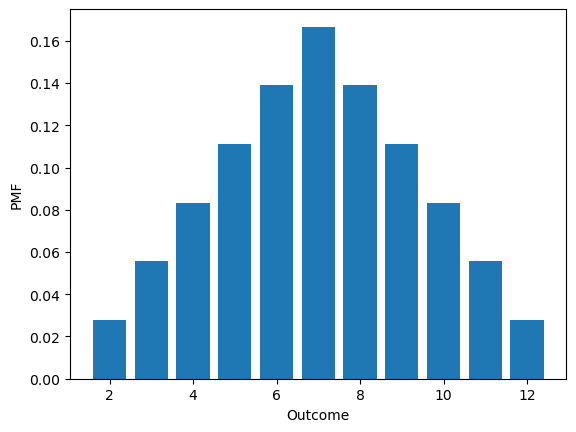

In [15]:
import numpy as np
from empiricaldist import Pmf
import matplotlib.pyplot as plt

def make_die(sides):
    outcomes = np.arange(1, sides + 1)
    dice = Pmf(1/sides, outcomes)
    return dice

def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum"""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 + p2
            res[q] = res(q) + p
    return res


die = make_die(6)
twice = Pmf.add_dist(die, die)

twice.bar()
ax = plt.gca()
ax.set(xlabel='Outcome', ylabel='PMF')

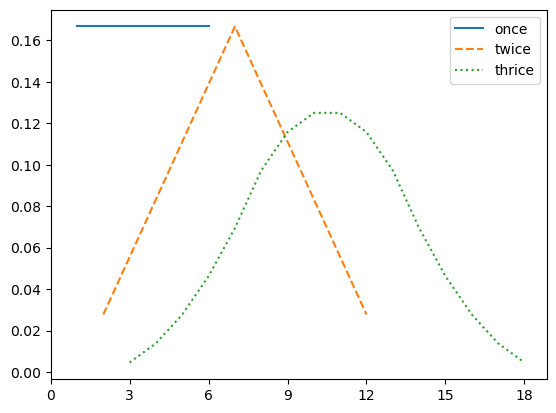

In [17]:
def add_dist_seq(seq):
    """Compute Pmf of the sum of values from seq."""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

dice = [die] * 3

thrice = add_dist_seq(dice)

die.plot(label = 'once')
twice.plot(label = 'twice', ls = '--')
thrice.plot(label = 'thrice', ls = ':')

plt.xticks([0, 3, 6, 9, 12, 15, 18])
ax = plt.gca()
ax.legend()

### (2) 麸质过敏
一篇论文，测试了被诊断为麸质过敏(我理解的是对小麦中的一些蛋白不能分解导致的过敏，但不是乳糜泻)的人是否能够在盲测中区分麸质面粉和非麸质面粉。在35名受试者中，有12人在食用麸质面粉时，出现症状，正确地识别出了麸质面粉。另有17人根据症状错误地识别了无麸质面粉，6人无法区分。作者得出结论:“双盲谷蛋白挑战仅在三分之一的患者中引起症状复发。”</br>
这个结论对我来说很奇怪，因为如果没有一个病人对麸质敏感，我们就会期望他们中的一些人偶然识别出麸质面粉。那么问题来了，根据这些数据，有多少受试者对麸质敏感，有多少人是猜测?</br>


我们可以用贝叶斯定理来回答这个问题，但首先我们要做一些建模决策。我假设:</br>

* 在挑战条件下，对麸质敏感的人有95%的概率正确识别麸质面粉</br>

* 不敏感的人有40%的概率偶然识别出麸质面粉(60%的概率选择其他面粉或无法区分麸质面粉)。</br>

这些特定的值是任意的，但是结果对这些选择并不敏感。</br>

分两步解决这个问题：</br>
* 假设我们知道有多少受试者是敏感的，计算数据的分布</br>
* 然后，利用数据的似然性，我将计算敏感患者数量的后验分布。</br>

按照我的理解，现在的问题是P（x|已知条件），先验就是P（x），P（对麸质过敏的受试者人数），均匀分布，从0-35；</br>
但是似然P（已知条件|x）是不确定的，似然包含两部分P（麸质过敏正确识别|x）+P（对麸质不过敏但偶然正确识别|x）</br>
需要计算出数据的似然，然后再计算后验分布</br>

第一个是前向问题;第二个是反问题。
#### A 前向问题
假设35名被试者中10名是敏感的，25名不敏感（题目中12名正确识别出麸质面粉，包含敏感正确识别和不敏感正确识别，假设10名是敏感的。）

[Text(0.5, 0, 'Number of correct identifications'),
 Text(0, 0.5, 'PMF'),
 Text(0.5, 1.0, 'Gluten sensitivity')]

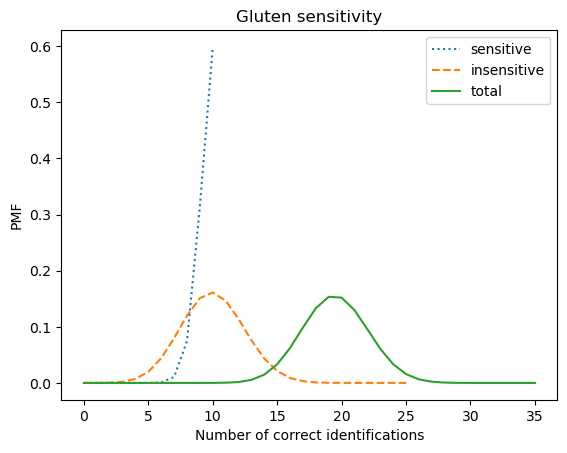

In [12]:
from empiricaldist import Pmf
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

def make_binomial(n, p):
    """Make a binomial distribution.

    n: number of trials
    p: probability of success

    returns: Pmf representing the distribution of k
    """
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum"""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 + p2
            res[q] = res(q) + p
    return res

dist_sensitive = make_binomial(num_sensitive, 0.95)
# print(dist_sensitive)
dist_insensitive = make_binomial(num_insensitive, 0.40)

dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

dist_sensitive.plot(label='sensitive', ls=':')
dist_insensitive.plot(label='insensitive', ls='--')
dist_total.plot(label='total')

ax = plt.gca()
ax.legend()
ax.set(xlabel='Number of correct identifications',
       ylabel='PMF',
       title='Gluten sensitivity')

我们期望大多数敏感受试者能够正确识别麸质面粉。在25名不敏感的受试者中，我们预计约有10人能偶然识别出麸质面粉。所以我们预计总共会有20个正确的识别。这是前向问题的答案:给定敏感主题的数量，我们可以计算数据的分布。
#### B 反向问题（计算后验）
先验考虑不同的敏感人群数，然后根据题目计算似然，最后得出后验

             0             1             2             3             4   \
0  1.719071e-08  1.432559e-09  1.193799e-10  9.948326e-12  8.290272e-13   
1  4.011165e-07  5.968996e-08  7.162795e-09  7.792856e-10  8.013930e-11   
2  4.545987e-06  9.741401e-07  1.709122e-07  2.506426e-08  3.269131e-09   

             5             6             7             8             9   ...  \
0  6.908560e-14  5.757133e-15  4.797611e-16  3.998009e-17  3.331674e-18  ...   
1  7.944844e-12  7.676178e-13  7.276377e-14  6.796616e-15  6.274653e-16  ...   
2  3.940182e-10  4.490244e-11  4.908756e-12  5.197412e-13  5.365476e-14  ...   

             26            27            28            29            30  \
0  1.501694e-36  1.251411e-37  1.042843e-38  8.690357e-40  7.241964e-41   
1  7.508469e-34  6.486483e-35  5.596590e-36  4.823148e-37  4.152060e-38   
2  1.806613e-31  1.620070e-32  1.449030e-33  1.292922e-34  1.151034e-35   

             31            32            33            34            35  
0  

[Text(0.5, 0, 'Number of correct identifications'),
 Text(0, 0.5, 'PMF'),
 Text(0.5, 1.0, 'Gluten sensitivity')]

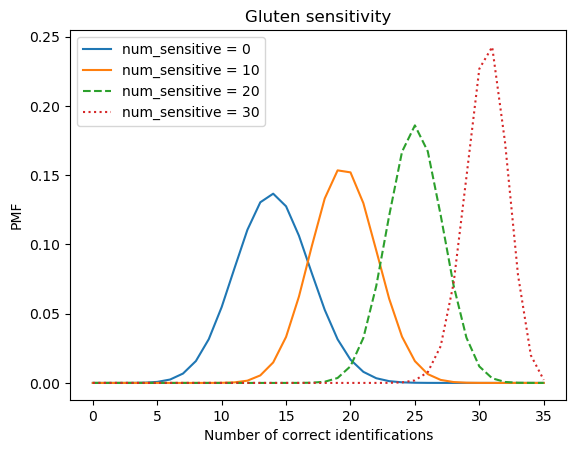

In [15]:
import pandas as pd

table = pd.DataFrame(index = range(n+1), columns = range(n+1)) # porior
for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
    table[num_sensitive] = dist_total
    
print(table.head(3))

table[0].plot(label='num_sensitive = 0')
table[10].plot(label='num_sensitive = 10')
table[20].plot(label='num_sensitive = 20', ls='--')
table[30].plot(label='num_sensitive = 30', ls=':')
    
ax = plt.gca()
ax.legend()
ax.set(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

从上图可以看到当敏感人数不同，数据分布是不同的，总的识别正确人数是不同的。

[Text(0.5, 0, 'Number of sensitive subjects'),
 Text(0, 0.5, 'PMF'),
 Text(0.5, 1.0, 'Posterior distributions')]

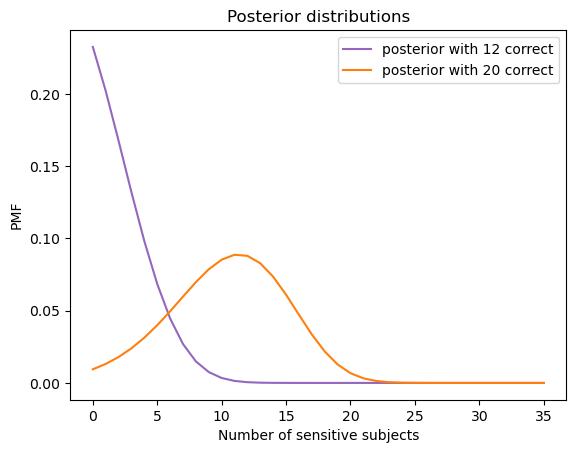

In [14]:
likelihood1 = table.loc[12]

hypos = np.arange(n+1)
prior = Pmf(1, hypos)

posterior1 = prior * likelihood1
posterior1.normalize()

likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

posterior1.plot(label='posterior with 12 correct', color='C4')
posterior2.plot(label='posterior with 20 correct', color='C1')

ax = plt.gca()
ax.legend()
ax.set(xlabel='Number of sensitive subjects',
         ylabel='PMF',
         title='Posterior distributions')

如果有12个正确的识别，最有可能的结论是没有一个实验对象对麸质过敏。如果有20个正确的识别，最有可能的结论是11-12个受试者是敏感的。我做的时候有过疑问，当时做的0.95和0.4的概率假设是否会影响后验，变化之后不影响后验。
## 3、有趣的课后题
美国国会有538名议员。假设我们对他们的投资组合进行审计，发现其中312家公司的表现优于市场。让我们假设一个诚实的国会议员只有50%的机会跑赢市场，但一个利用内幕消息进行交易的不诚实议员有90%的机会。有多少国会议员是诚实的?</br>
* 分析</br>
这个问题求得是P（诚实国会会员数|已知条件）；先验P（诚实国会会员数），假设其为均匀分布，0-538；</br>
312家公司的表现优于市场，其中国包含诚实的国会议员和不诚实的国会议员，似然应该包含诚实的国会议员跑赢市场，不诚实的国会议员跑赢市场，两个分布加起来。

431.48821145019957


[Text(0.5, 0, 'Number of honest members of Congress'), Text(0, 0.5, 'PMF')]

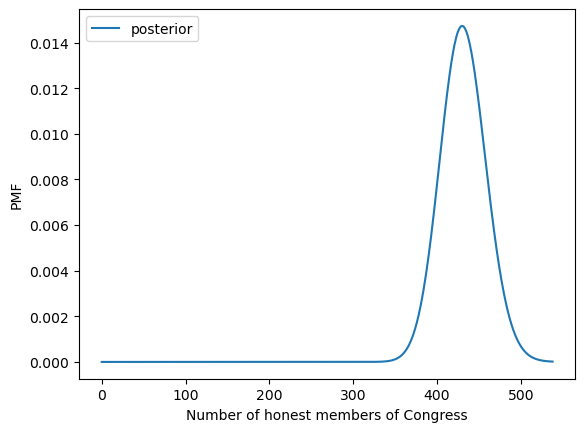

In [17]:
from empiricaldist import Pmf
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"""
Congress Problem:
    There are 538 members of the United States Congress. 
    Suppose we audit their investment portfolios and find that 
    312 of them out-perform the market. 
    Let's assume that an honest member of Congress has only a 
    50% chance of out-performing the market, but a dishonest 
    member who trades on inside information has a 90% chance. 
    How many members of Congress are honest?
"""

def make_binomial(n, p):
    """Make a binomial distribution.

    n: number of trials
    p: probability of success

    returns: Pmf representing the distribution of k
    """
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum"""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 + p2
            res[q] = res(q) + p
    return res

n = 538

table = pd.DataFrame(index = range(n+1), columns = range(n+1))

for n_honest in range(0, n+1):
    n_dishonest = n - n_honest
        
    dist_honest = make_binomial(n_honest, 0.5)
    dist_dishonest = make_binomial(n_dishonest, 0.9)
    dist_total = Pmf.add_dist(dist_honest, dist_dishonest)    

    table[n_honest] = dist_total
    
data = 312
likelihood = table.loc[312]

hypos = np.arange(n+1)
prior = Pmf(1, hypos)

posterior = prior * likelihood 
posterior.normalize()

print(posterior.mean())
posterior.plot(label='posterior')
ax = plt.gca()
ax.legend()
ax.set(xlabel='Number of honest members of Congress',
         ylabel='PMF')
    